In [108]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification
import pandas as pd
import seaborn as sns
from collections import Counter

In [138]:
plt.rcParams['figure.figsize']=[12,8]
X, y =make_classification(n_samples=1000, class_sep = 2, random_state=42, n_informative = 5, n_features=8,n_classes=2)
print(np.unique(y))


[0 1]


In [139]:
print(X.shape, y.shape)
df = pd.DataFrame(X)
df = pd.DataFrame(X, columns=[f'feature_{i+1}'for i in range(X.shape[1])])
df.head()


(1000, 8) (1000,)


,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8
0,-0.756153,-1.164471,-0.705182,1.108321,-1.078425,0.990766,1.363777,1.727296
1,-0.349763,-0.725064,-0.776536,0.164623,-2.123291,-0.312199,0.081420,1.073886
2,-4.390672,-1.590640,-1.343470,9.286103,2.222753,1.085890,-2.715076,4.223089
3,1.064793,0.967040,-0.723131,-3.114630,0.798928,0.214848,1.890636,-2.379626
4,-0.561940,-1.914989,0.953398,1.090123,-1.048063,-0.600604,1.511169,0.550706


In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature_1  1000 non-null   float64
 1   feature_2  1000 non-null   float64
 2   feature_3  1000 non-null   float64
 3   feature_4  1000 non-null   float64
 4   feature_5  1000 non-null   float64
 5   feature_6  1000 non-null   float64
 6   feature_7  1000 non-null   float64
 7   feature_8  1000 non-null   float64
dtypes: float64(8)
memory usage: 62.6 KB


In [141]:
df.describe()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.011035,-0.992447,-0.042531,1.281358,0.980472,0.940024,0.999845,0.969059
std,2.368319,2.162463,1.042954,4.299708,2.194454,2.243316,2.219235,2.131681
min,-6.814203,-5.258034,-3.582063,-10.154179,-5.661168,-7.037758,-4.117079,-3.961769
25%,-2.065423,-2.442564,-0.734871,-1.784043,-0.444584,-0.475777,-0.792475,-0.790478
50%,0.188279,-1.643173,-0.030551,1.821636,1.517834,1.131113,1.401614,1.525408
75%,1.916099,-0.267244,0.642444,3.944946,2.507637,2.414038,2.531734,2.447875
max,5.605669,6.685693,3.240139,10.944172,6.066061,8.501559,6.608412,7.036793


In [142]:
df.isna().sum()

feature_1    0
feature_2    0
feature_3    0
feature_4    0
feature_5    0
feature_6    0
feature_7    0
feature_8    0
dtype: int64

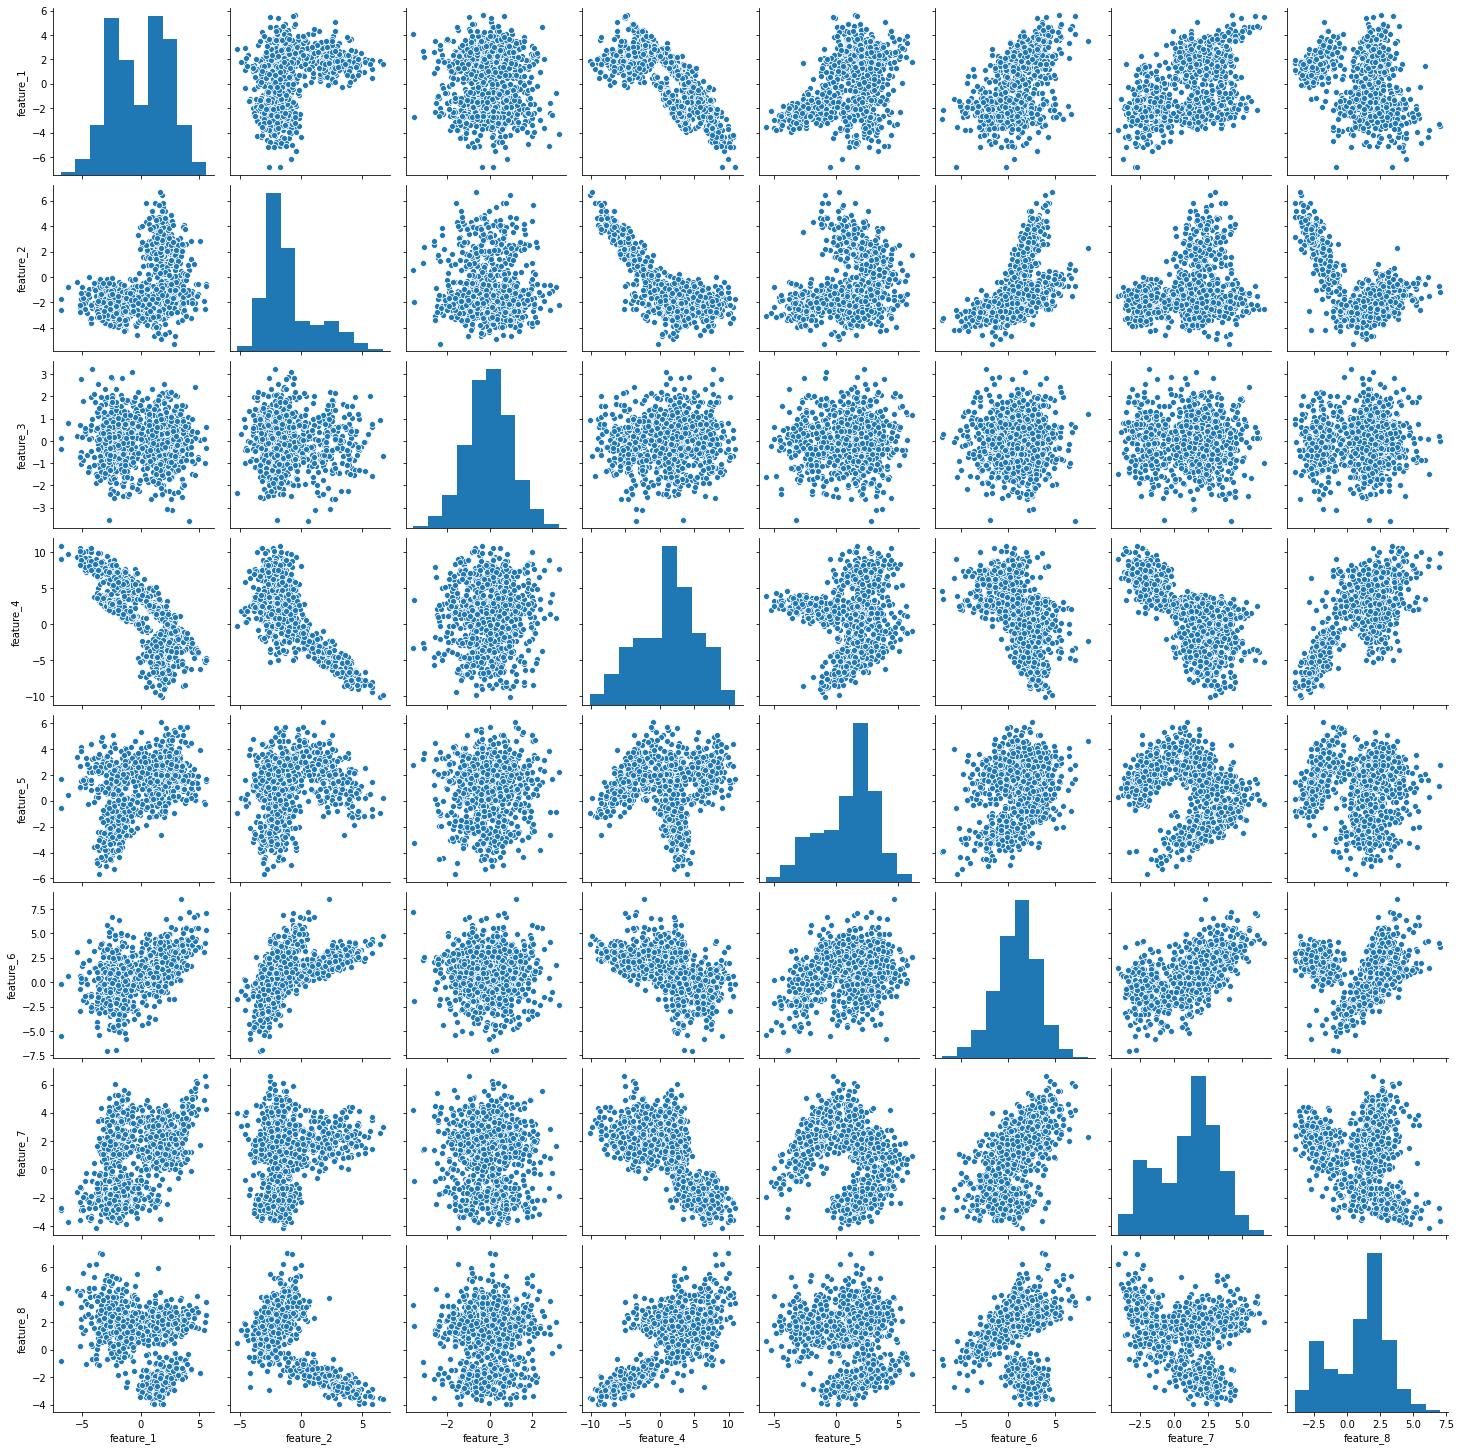

In [11]:
sns.pairplot(df)

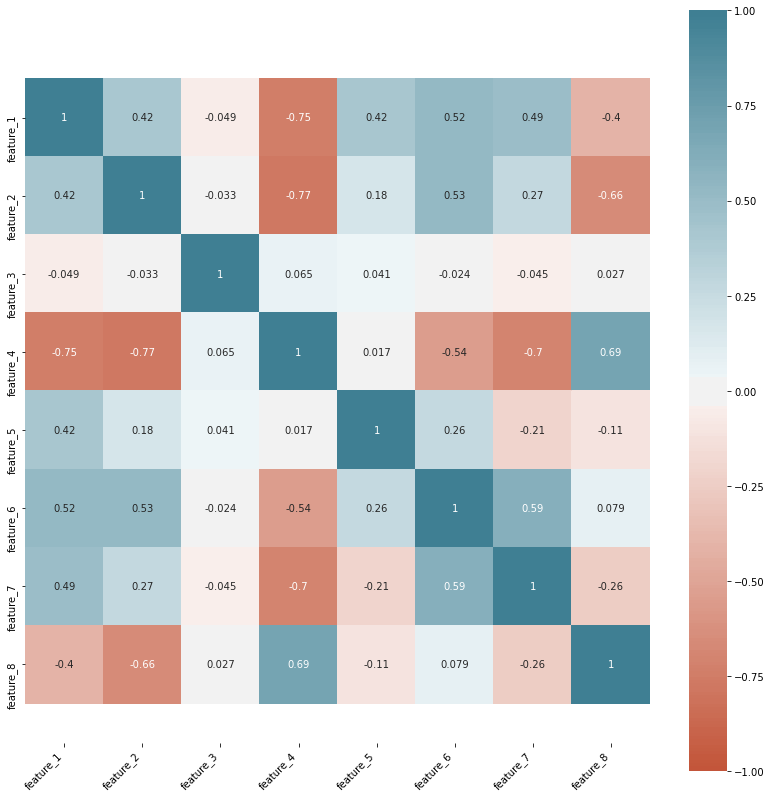

In [143]:
import seaborn as sns
corr = df.corr()

plt.figure(figsize=(14, 14))
ax = sns.heatmap(corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_ylim(len(corr)+0.5, -0.5);

In [144]:
from scipy import stats
z=np.abs(stats.zscore(df))
z

array([[0.3147762 , 0.07958996, 0.63567808, ..., 0.02263053, 0.16407219,
        0.35587728],
       [0.14309631, 0.12370915, 0.70412792, ..., 0.55848095, 0.41405454,
        0.04920046],
       [1.85018486, 0.27676419, 1.24798476, ..., 0.0650551 , 1.67480255,
        1.52727275],
       ...,
       [0.7948603 , 0.25018552, 0.76093524, ..., 0.55495903, 1.71314673,
        0.93007299],
       [0.32250431, 2.21240704, 0.35056551, ..., 0.81327217, 0.5874893 ,
        1.7494309 ],
       [1.51706964, 0.43299196, 2.47896247, ..., 1.08924599, 1.42863043,
        0.09850057]])

In [145]:
outliers=list(set(np.where(z>3)[0]))
#print(list(set(np.where(z>3)[0])))
len(outliers)

15

In [146]:
new_df = df.drop(outliers,axis = 0).reset_index(drop = False)
display(new_df)

y_new = y[list(new_df["index"])]
len(y_new)

,index,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8
0,0,-0.756153,-1.164471,-0.705182,1.108321,-1.078425,0.990766,1.363777,1.727296
1,1,-0.349763,-0.725064,-0.776536,0.164623,-2.123291,-0.312199,0.081420,1.073886
2,2,-4.390672,-1.590640,-1.343470,9.286103,2.222753,1.085890,-2.715076,4.223089
3,3,1.064793,0.967040,-0.723131,-3.114630,0.798928,0.214848,1.890636,-2.379626
4,4,-0.561940,-1.914989,0.953398,1.090123,-1.048063,-0.600604,1.511169,0.550706
...,...,...,...,...,...,...,...,...,...
980,995,2.887202,-1.045570,-0.668876,-0.884461,1.973363,3.040845,2.151270,1.966244
981,996,-0.912929,-1.251949,1.179913,1.833829,-0.211064,1.078609,1.239636,1.703973
982,997,-1.892576,-1.533193,0.750693,5.846840,0.844300,-0.304302,-2.800129,2.950686
983,998,0.752376,3.789408,-0.407971,-5.246543,1.449600,2.763538,2.302969,-2.758305


985

In [147]:
X_new = new_df.drop('index', axis = 1)

from sklearn.preprocessing import StandardScaler, MinMaxScaler
X_scaled = MinMaxScaler().fit_transform(X_new)
X_scaled

array([[0.48777079, 0.38084378, 0.40174031, ..., 0.51377688, 0.51101219,
        0.51725538],
       [0.5204917 , 0.42172391, 0.38987215, ..., 0.41064665, 0.39145056,
        0.45784669],
       [0.19513337, 0.34119526, 0.29557564, ..., 0.521306  , 0.13071691,
        0.7441753 ],
       ...,
       [0.39627035, 0.3465398 , 0.64389184, ..., 0.41127169, 0.122787  ,
        0.6284872 ],
       [0.6092317 , 0.84172693, 0.4511745 , ..., 0.65409256, 0.59857853,
        0.10942014],
       [0.25862264, 0.30978041, 0.94177166, ..., 0.31645144, 0.18162744,
        0.46739698]])

In [148]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [149]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train,y_train)
print("Accuracy of train:",clf.score(X_train,y_train))
print("Accuracy of test:",clf.score(X_test,y_test))

Accuracy of train: 0.97625
Accuracy of test: 0.98


In [150]:
# Classification Report
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, f1_score
pred = clf.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        95
           1       0.99      0.97      0.98       105

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200



In [151]:
print("Precision = {}".format(precision_score(y_test, pred, average='macro')))
print("Recall = {}".format(recall_score(y_test, pred, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, pred)))
print("F1 Score = {}".format(f1_score(y_test, pred,average='macro')))

Precision = 0.979681713542188
Recall = 0.9804511278195489
Accuracy = 0.98
F1 Score = 0.9799679487179487


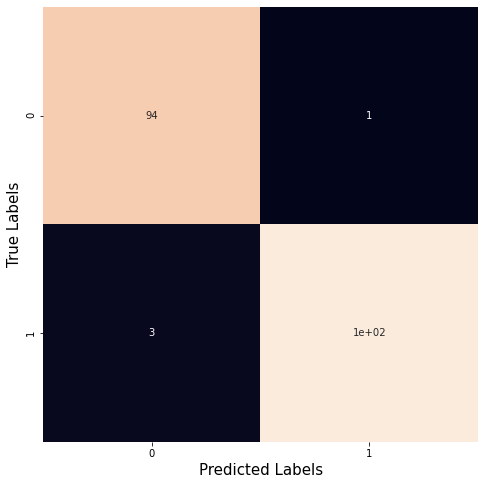

In [153]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(12, 8))
ax =sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

In [160]:
!pip install xgboost

In [163]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV  


In [164]:
dmatrix_train = xgb.DMatrix(data=X_train, label=y_train)
dmatrix_test = xgb.DMatrix(data=X_test, label=y_test)

param = {'max_depth':4, 
         'eta':1, 
         'objective':'multi:softprob', 
         'num_class':2}

num_round = 5
model = xgb.train(param, dmatrix_train, num_round)

[14:41:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [165]:
preds = model.predict(dmatrix_test)
preds[:10]

array([[0.00125315, 0.9987469 ],
       [0.00433067, 0.99566936],
       [0.98622143, 0.01377855],
       [0.99573463, 0.00426536],
       [0.00298245, 0.9970176 ],
       [0.00125315, 0.9987469 ],
       [0.01877374, 0.9812262 ],
       [0.8700408 , 0.12995915],
       [0.9971482 , 0.00285174],
       [0.02942763, 0.9705724 ]], dtype=float32)

In [166]:
best_preds = np.asarray([np.argmax(line) for line in preds])
best_preds

array([1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0], dtype=int64)

In [167]:
print("Precision = {}".format(precision_score(y_test, best_preds, average='macro')))
print("Recall = {}".format(recall_score(y_test, best_preds, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, best_preds)))

Precision = 0.979681713542188
Recall = 0.9804511278195489
Accuracy = 0.98
